In [25]:
import mediapipe as mp
import matplotlib.pyplot as plt 
import numpy as np
from numpy import arccos, array
from numpy.linalg import norm
import math

import cv2

In [26]:
mp_drawing= mp.solutions.drawing_utils
mp_pose= mp.solutions.pose


with mp_pose.Pose(
    static_image_mode=True
)as pose:
    
    image =cv2.imread("imagenes/2.jpg")
    height, width, _ = image.shape
    imagen_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    vectores =[]
    results= pose.process(imagen_rgb)
    #print("Pose landmarks", results.pose_landmarks )
    
    if results.pose_landmarks is not None:
        
        #resultados de las cordeanadas de las extremidades
        rightShoulderX= (int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x*width))
        rightShoulderY=  (int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y*height))
        rightElbowX= (int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x*width))
        rightElbowY=  (int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y*height))
        rightWristX= (int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x*width))
        rightWristY=  (int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y*height))
        vectoresX =[rightShoulderX, rightElbowX ]
        vectoresY =[rightShoulderY,rightElbowY]
        cv2.line(image,(rightShoulderX,rightShoulderY),(rightElbowX,rightElbowY) , (255, 255 , 255), 3)
        cv2.line(image,(rightElbowX,rightElbowY),(rightWristX,rightWristY) , (255, 255 , 255), 3)
        
        vector_AB = (rightElbowX - rightShoulderX, rightElbowY - rightShoulderY)
        vector_BC = (rightWristX - rightElbowX, rightWristY - rightElbowY)
        cv2.circle(image,(rightShoulderX,rightShoulderY),6 , (128, 0 , 2555), -1)
        cv2.circle(image,(rightElbowX,rightElbowY),6 , (128, 0 , 2555), -1)
        cv2.circle(image,(rightWristX,rightWristY),6 , (128, 0 , 2555), -1)
        '''
        mp_drawing.draw_landmarks(image, results.pose_landmarks,
                                  mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(128, 0, 250),
                                  thickness=2, circle_radius = 3),
                                  mp_drawing.DrawingSpec(color=(255, 255, 250),
                                  thickness=2)
                                  )
        '''
    cv2.imshow("Image",image)
    cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'tuple' object has no attribute 'dot'

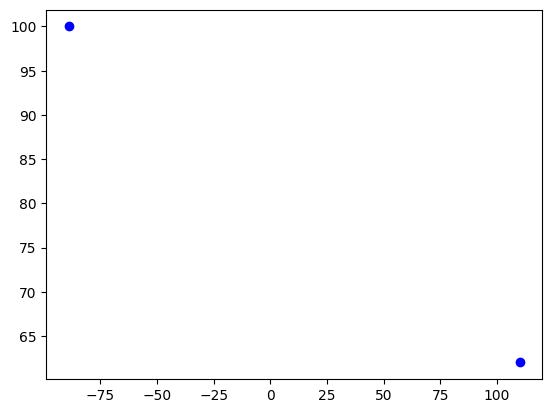

In [27]:
def angles(vector_AB, vector_BC): 
  #using the arccos function from numpy
  return arccos(vector_AB.dot(vector_AB)/(norm(vector_AB)*norm(vector_BC)))
plt.plot( vector_AB,vector_BC,'bo')


c= angles(vector_AB,vector_BC)
angle= math.degrees(c)
print("the angle between the two vectors is=",angle)
